# YOLOv5

# 1.Setup

In [ ]:
!pip install ultralytics==8.0.0
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [ ]:
import os
import glob
from IPython.display import Image, display

In [ ]:
HOME = os.getcwd()

In [ ]:
%cd {HOME}

!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 16057, done.
remote: Total 16057 (delta 0), reused 0 (delta 0), pack-reused 16057
Receiving objects: 100% (16057/16057), 14.66 MiB | 19.35 MiB/s, done.
Resolving deltas: 100% (11028/11028), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.0
    Uninstalling ultralytics-8.0.0:
      Successfully uninstalled ultralytics-8.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillo

# 2.Importing the Dataset from Roboflow

In [ ]:
!mkdir {HOME}/dataset
%cd {HOME}/dataset

/content/dataset


In [ ]:
!curl -L "https://app.roboflow.com/ds/umDxuRTGSq?key=yFe87DnmKj" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   2752      0 --:--:-- --:--:-- --:--:--  2755
100 23.8M  100 23.8M    0     0  28.4M      0 --:--:-- --:--:-- --:--:-- 72.2M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/1913_png.rf.1e406ce1cf63c36b7fe2e44b914f39ca.jpg  
 extracting: test/images/1914_png.rf.e198088d2391af92b75a31b79d9b2374.jpg  
 extracting: test/images/1918_png.rf.8f5c6249bf896bd0c1b2082978c1f551.jpg  
 extracting: test/images/756_png.rf.7c84af7902b4a3265b4c2a193324d895.jpg  
 extracting: test/images/757_png.rf.c62d58733b4681b20b6aa18461f5a4b8.jpg  
 extracting: test/images/758_png.rf.a5daa6f234c9523305ef2971218de912.jpg  
 extracting: test/images/762_png.rf.cb4a8a510a4d2

In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="50DLCu4aJDBaf7tVrkFB")
# project = rf.workspace("cs205assessment2").project("strawberry_detection_2")
# dataset = project.version(1).download("yolov5")

# 3.Train the YOLOv5 Model

In [ ]:
%cd /content/yolov5

!python train.py --img 640 --epochs 150 --data /content/dataset/data.yaml --weights yolov5m.pt

/content/yolov5
WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.
2023-11-10 02:10:29.101561: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 02:10:29.101631: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 02:10:29.101684: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yo

# 4.Evaluation

## 4.1 Confusion Matrix

/content


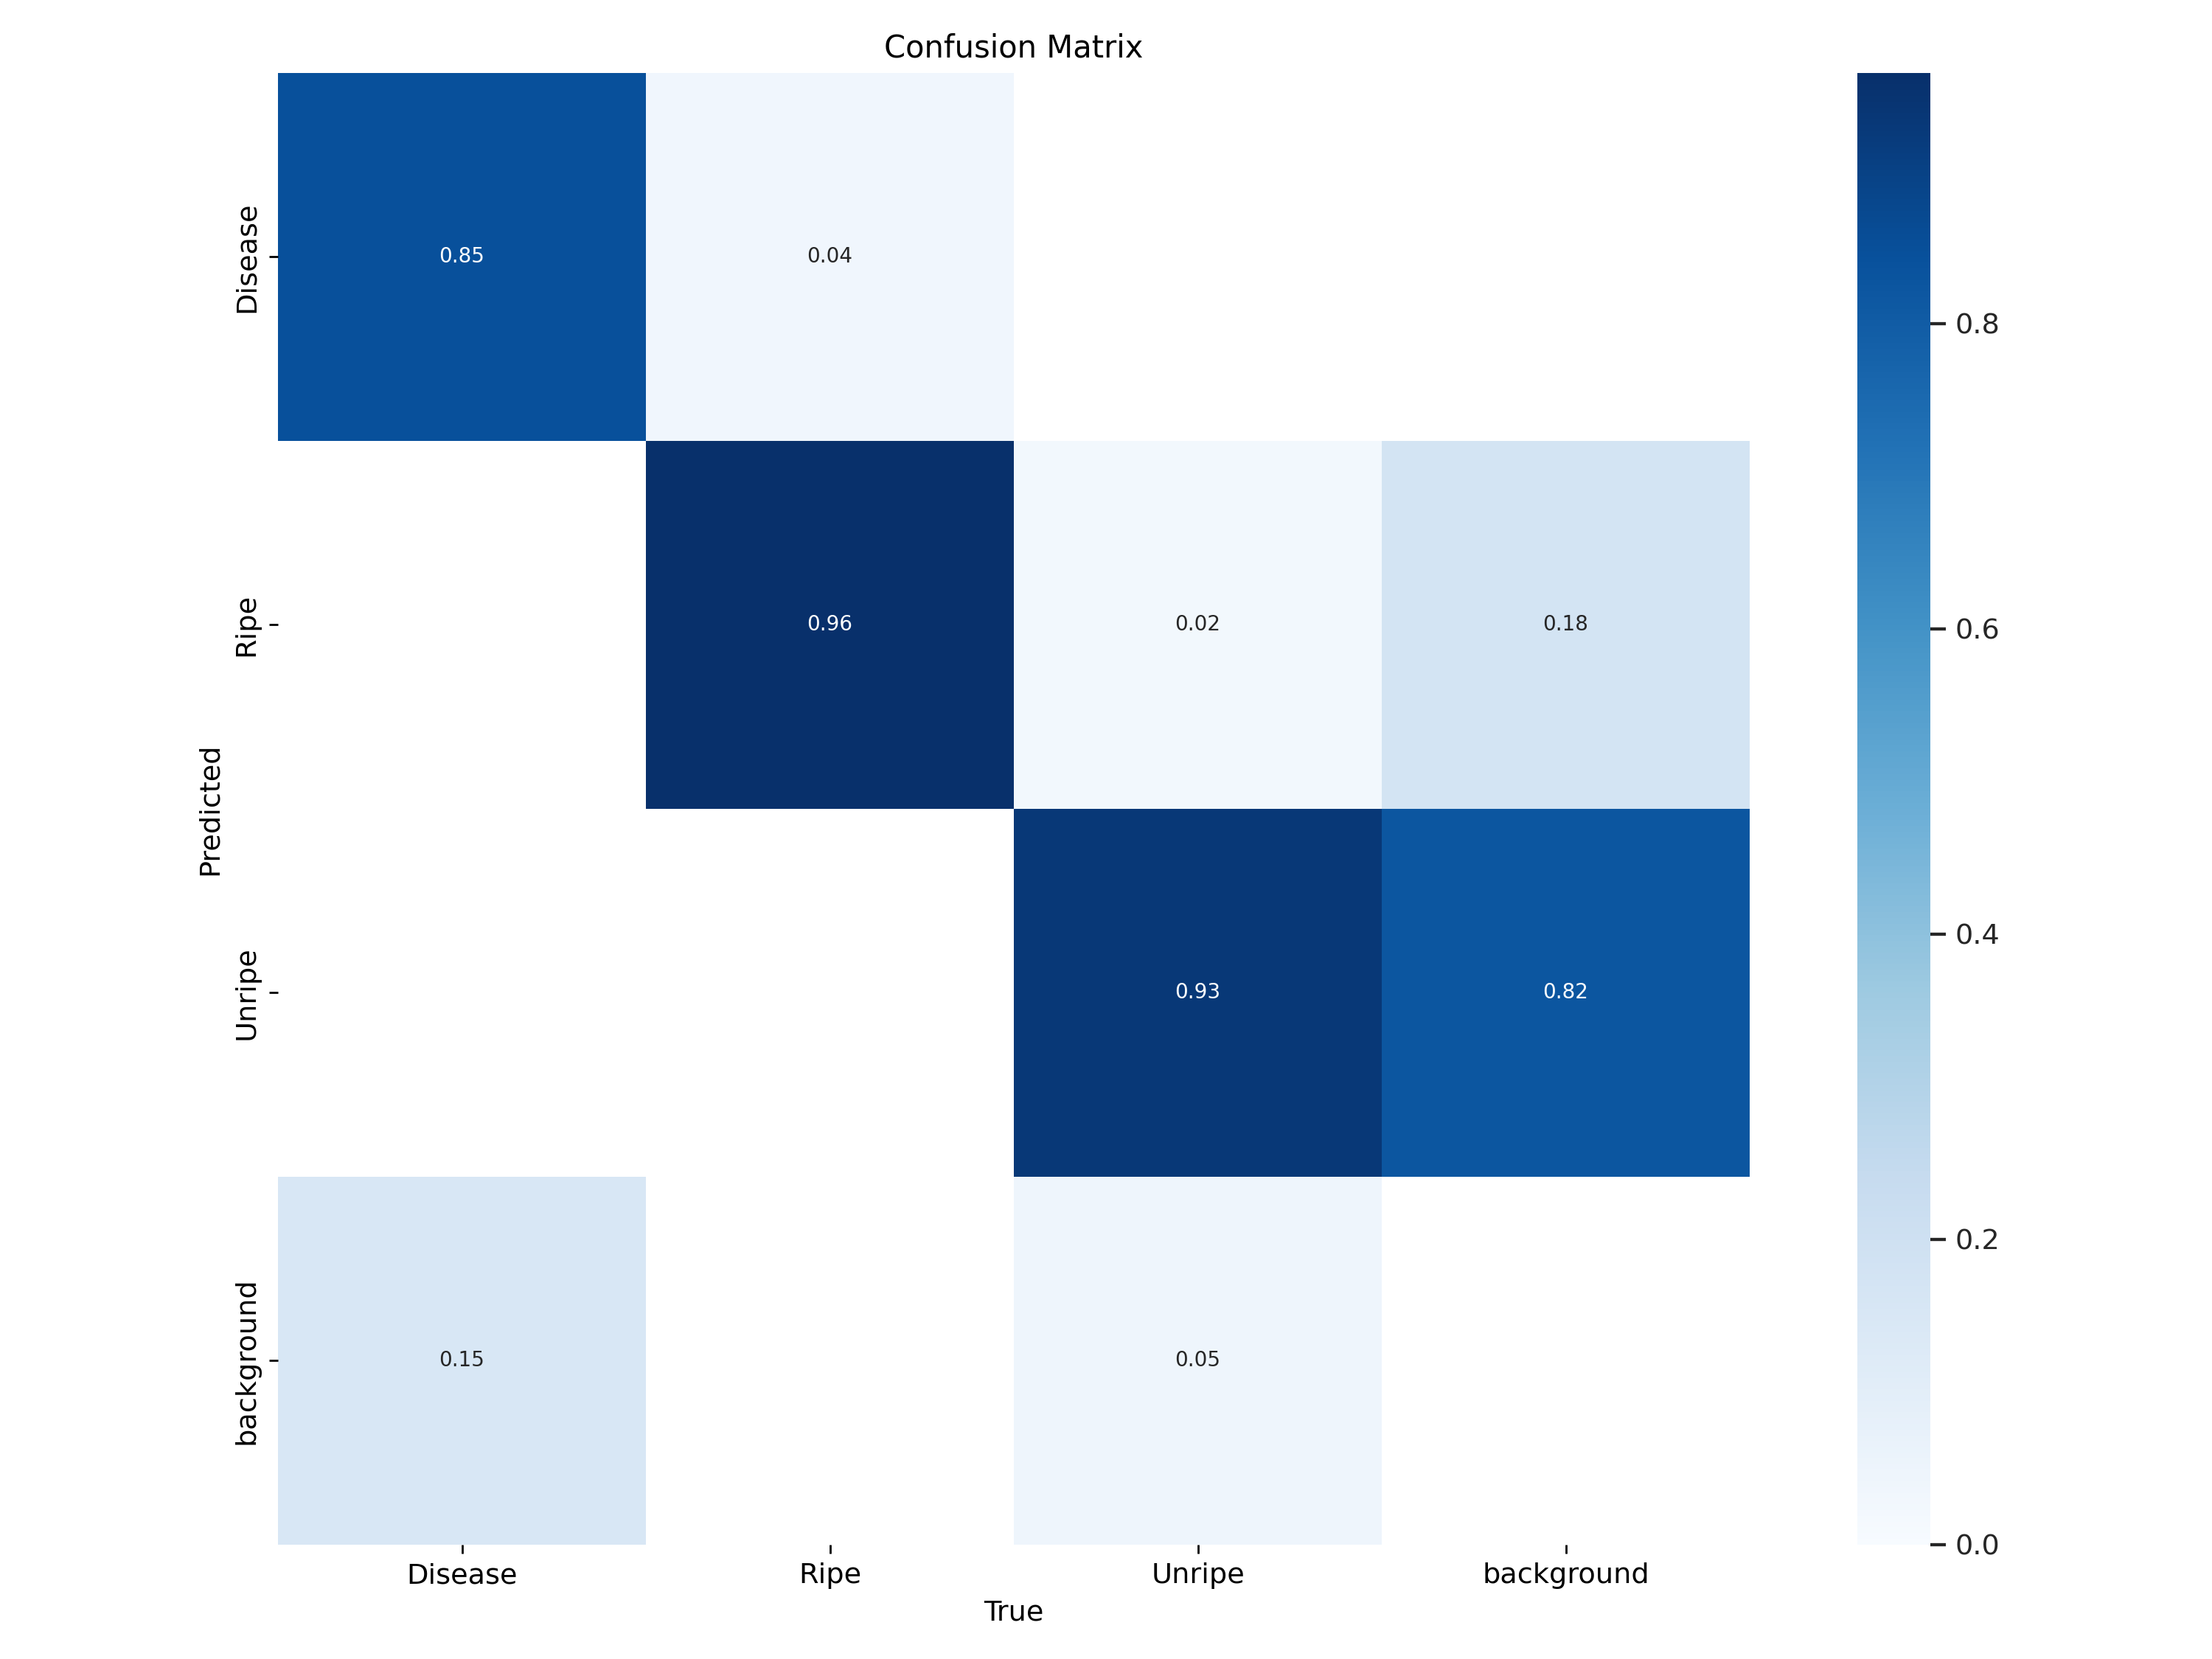

In [ ]:
%cd {HOME}
Image(filename=f'/content/yolov5/runs/train/exp/confusion_matrix.png', width=900)

## 4.2 Loss and Accuracy

/content


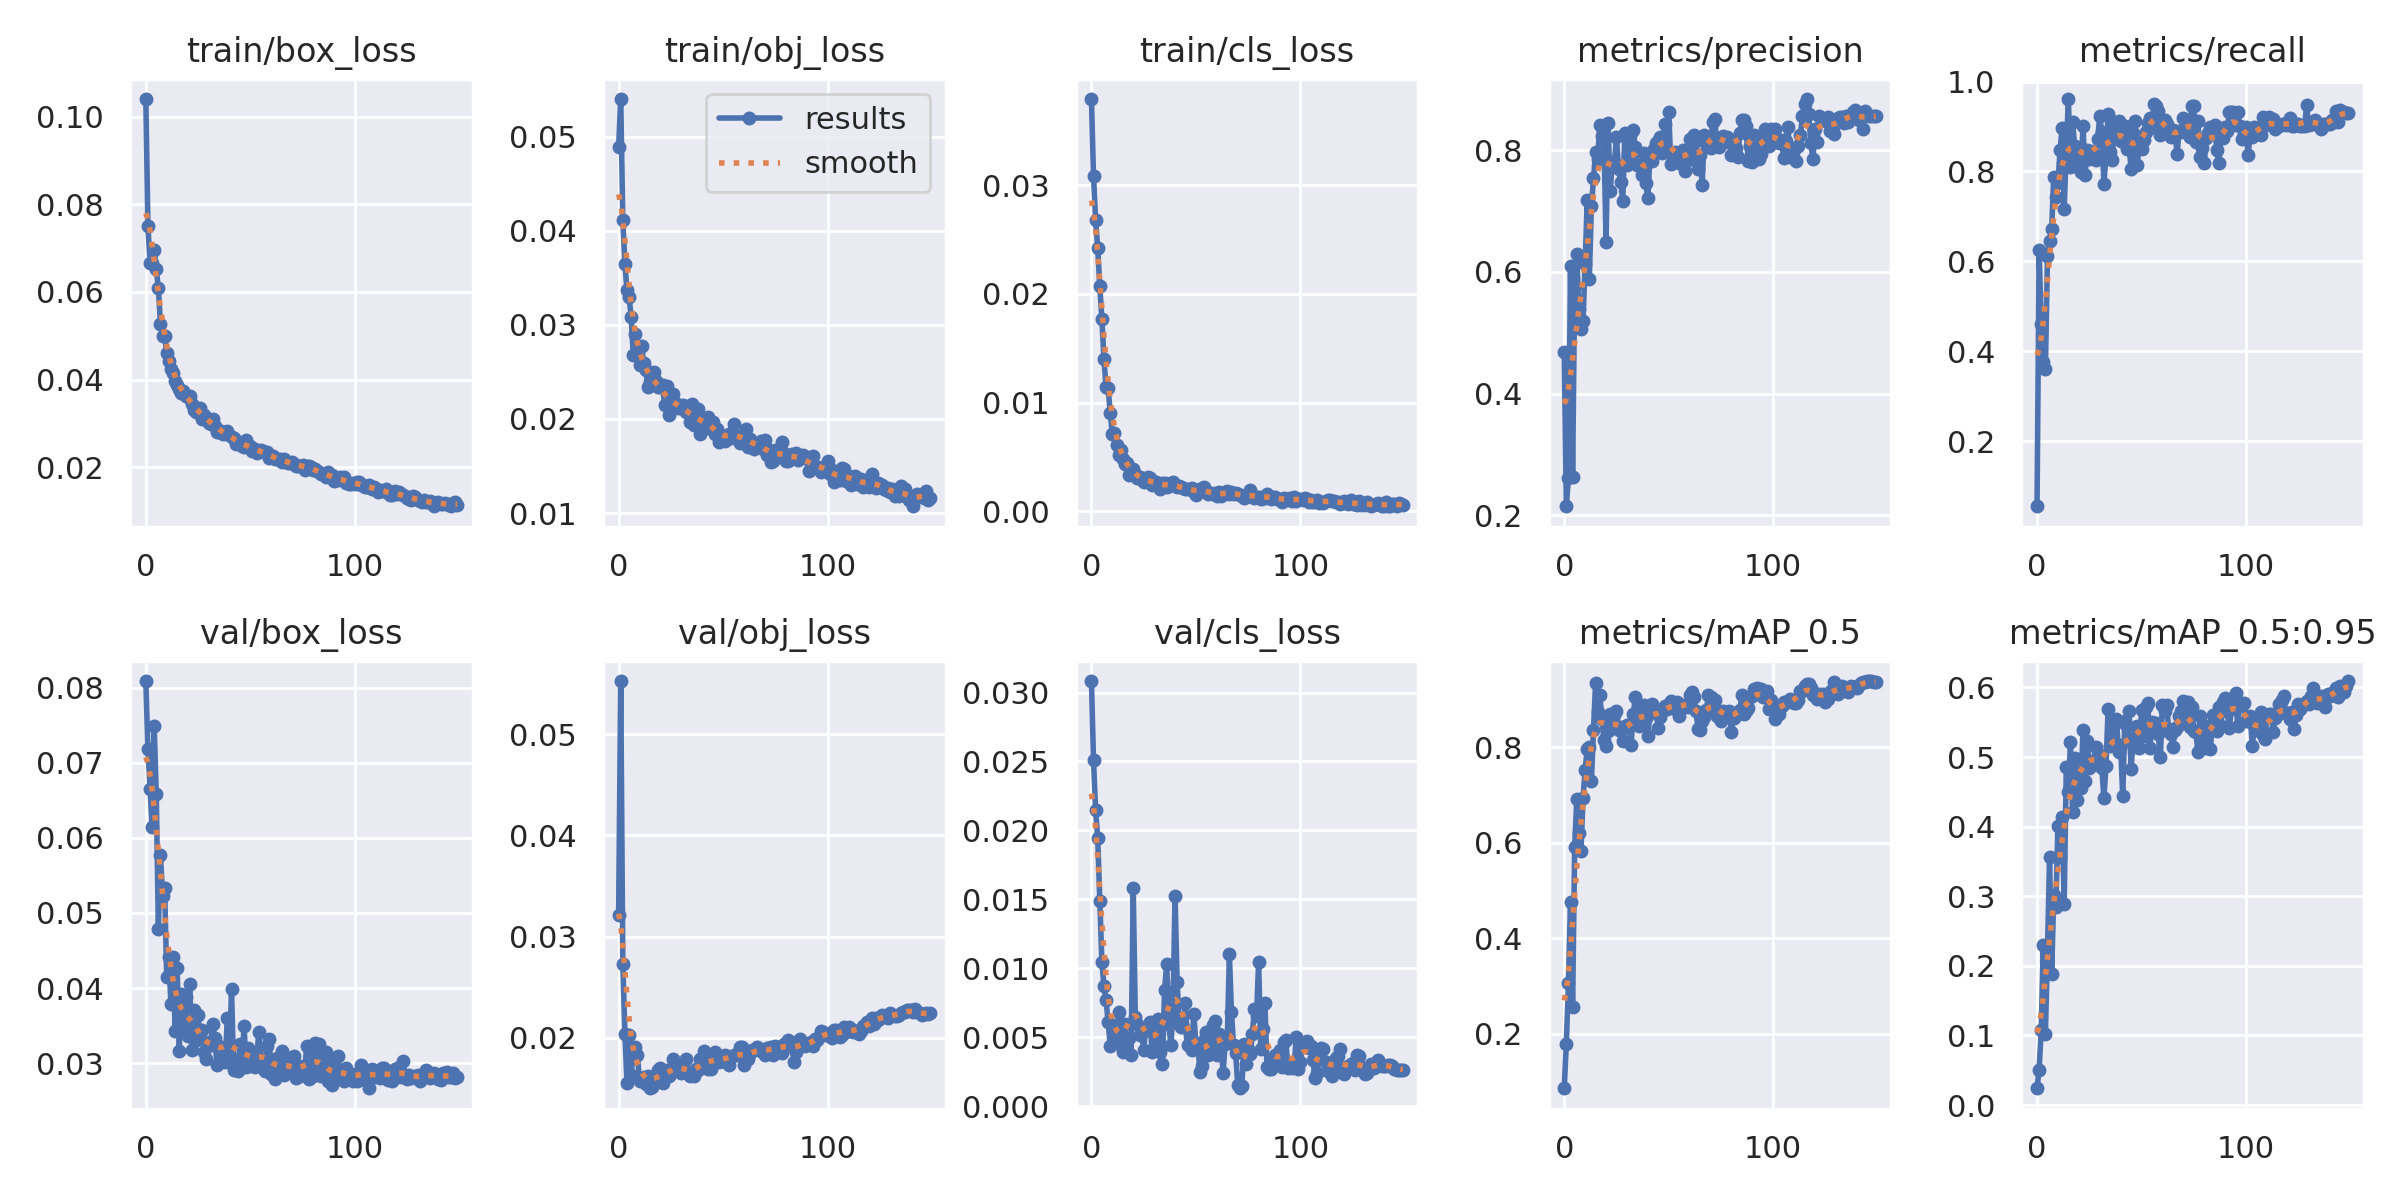

In [ ]:
%cd {HOME}

Image(filename=f'/content/yolov5/runs/train/exp/results.png', width=900)

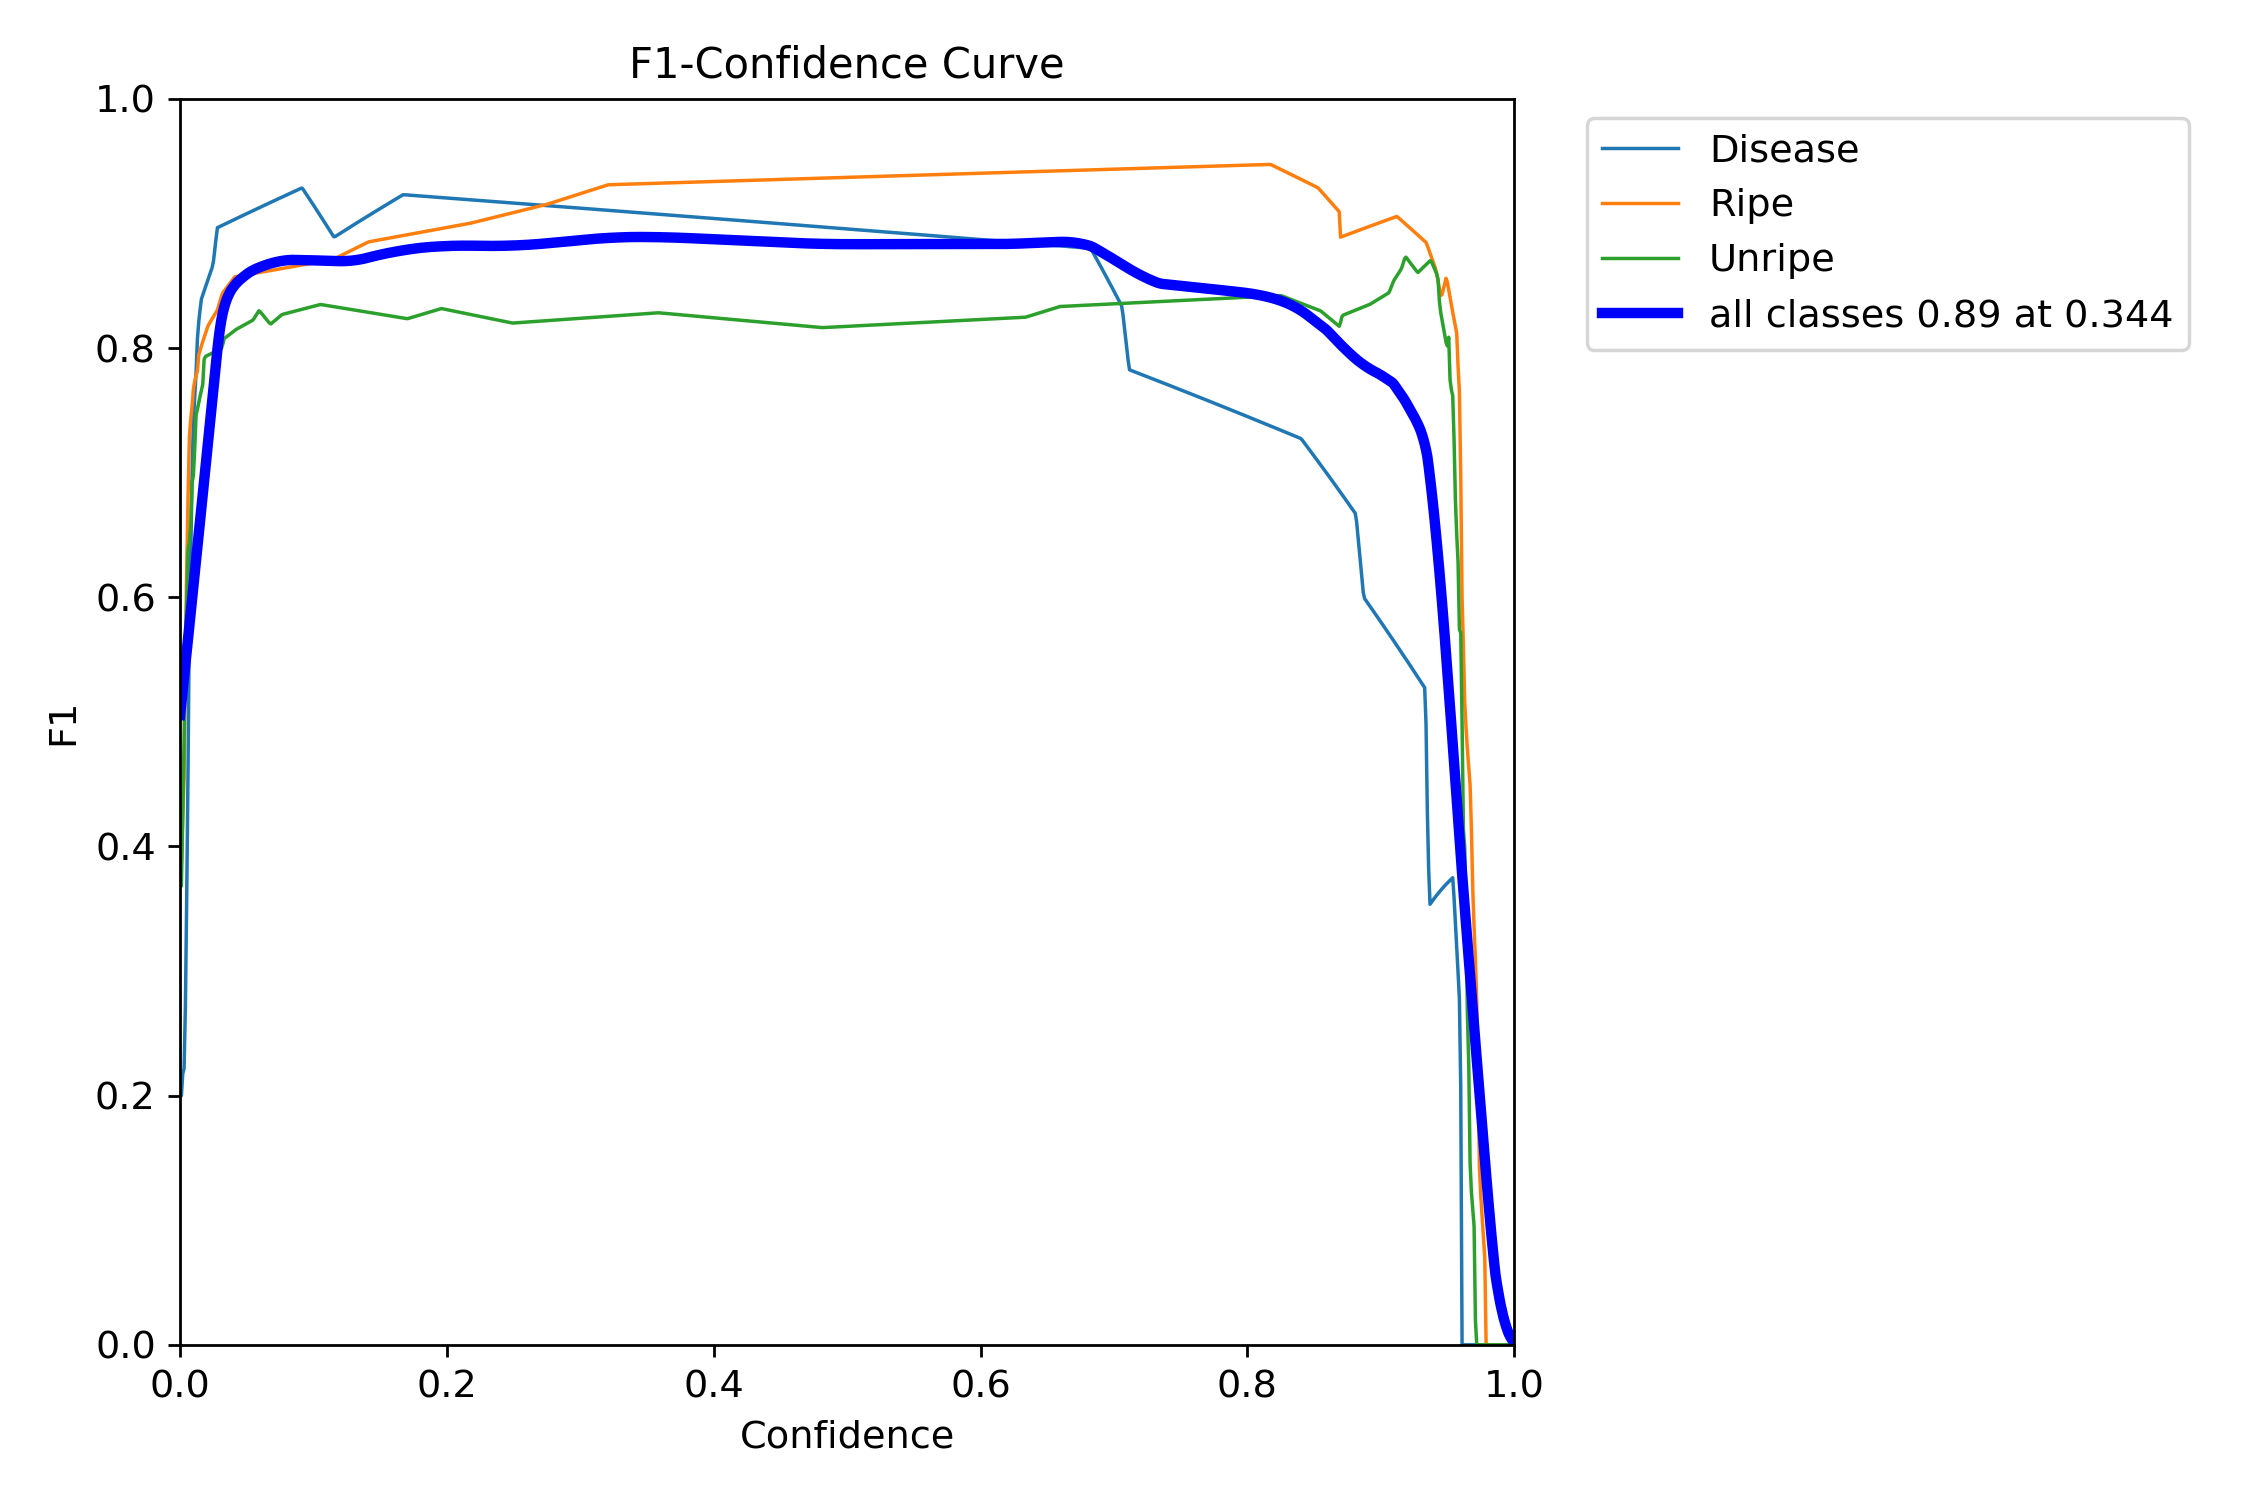

In [ ]:
Image(filename=f'/content/yolov5/runs/train/exp/F1_curve.png', width=600)

/content


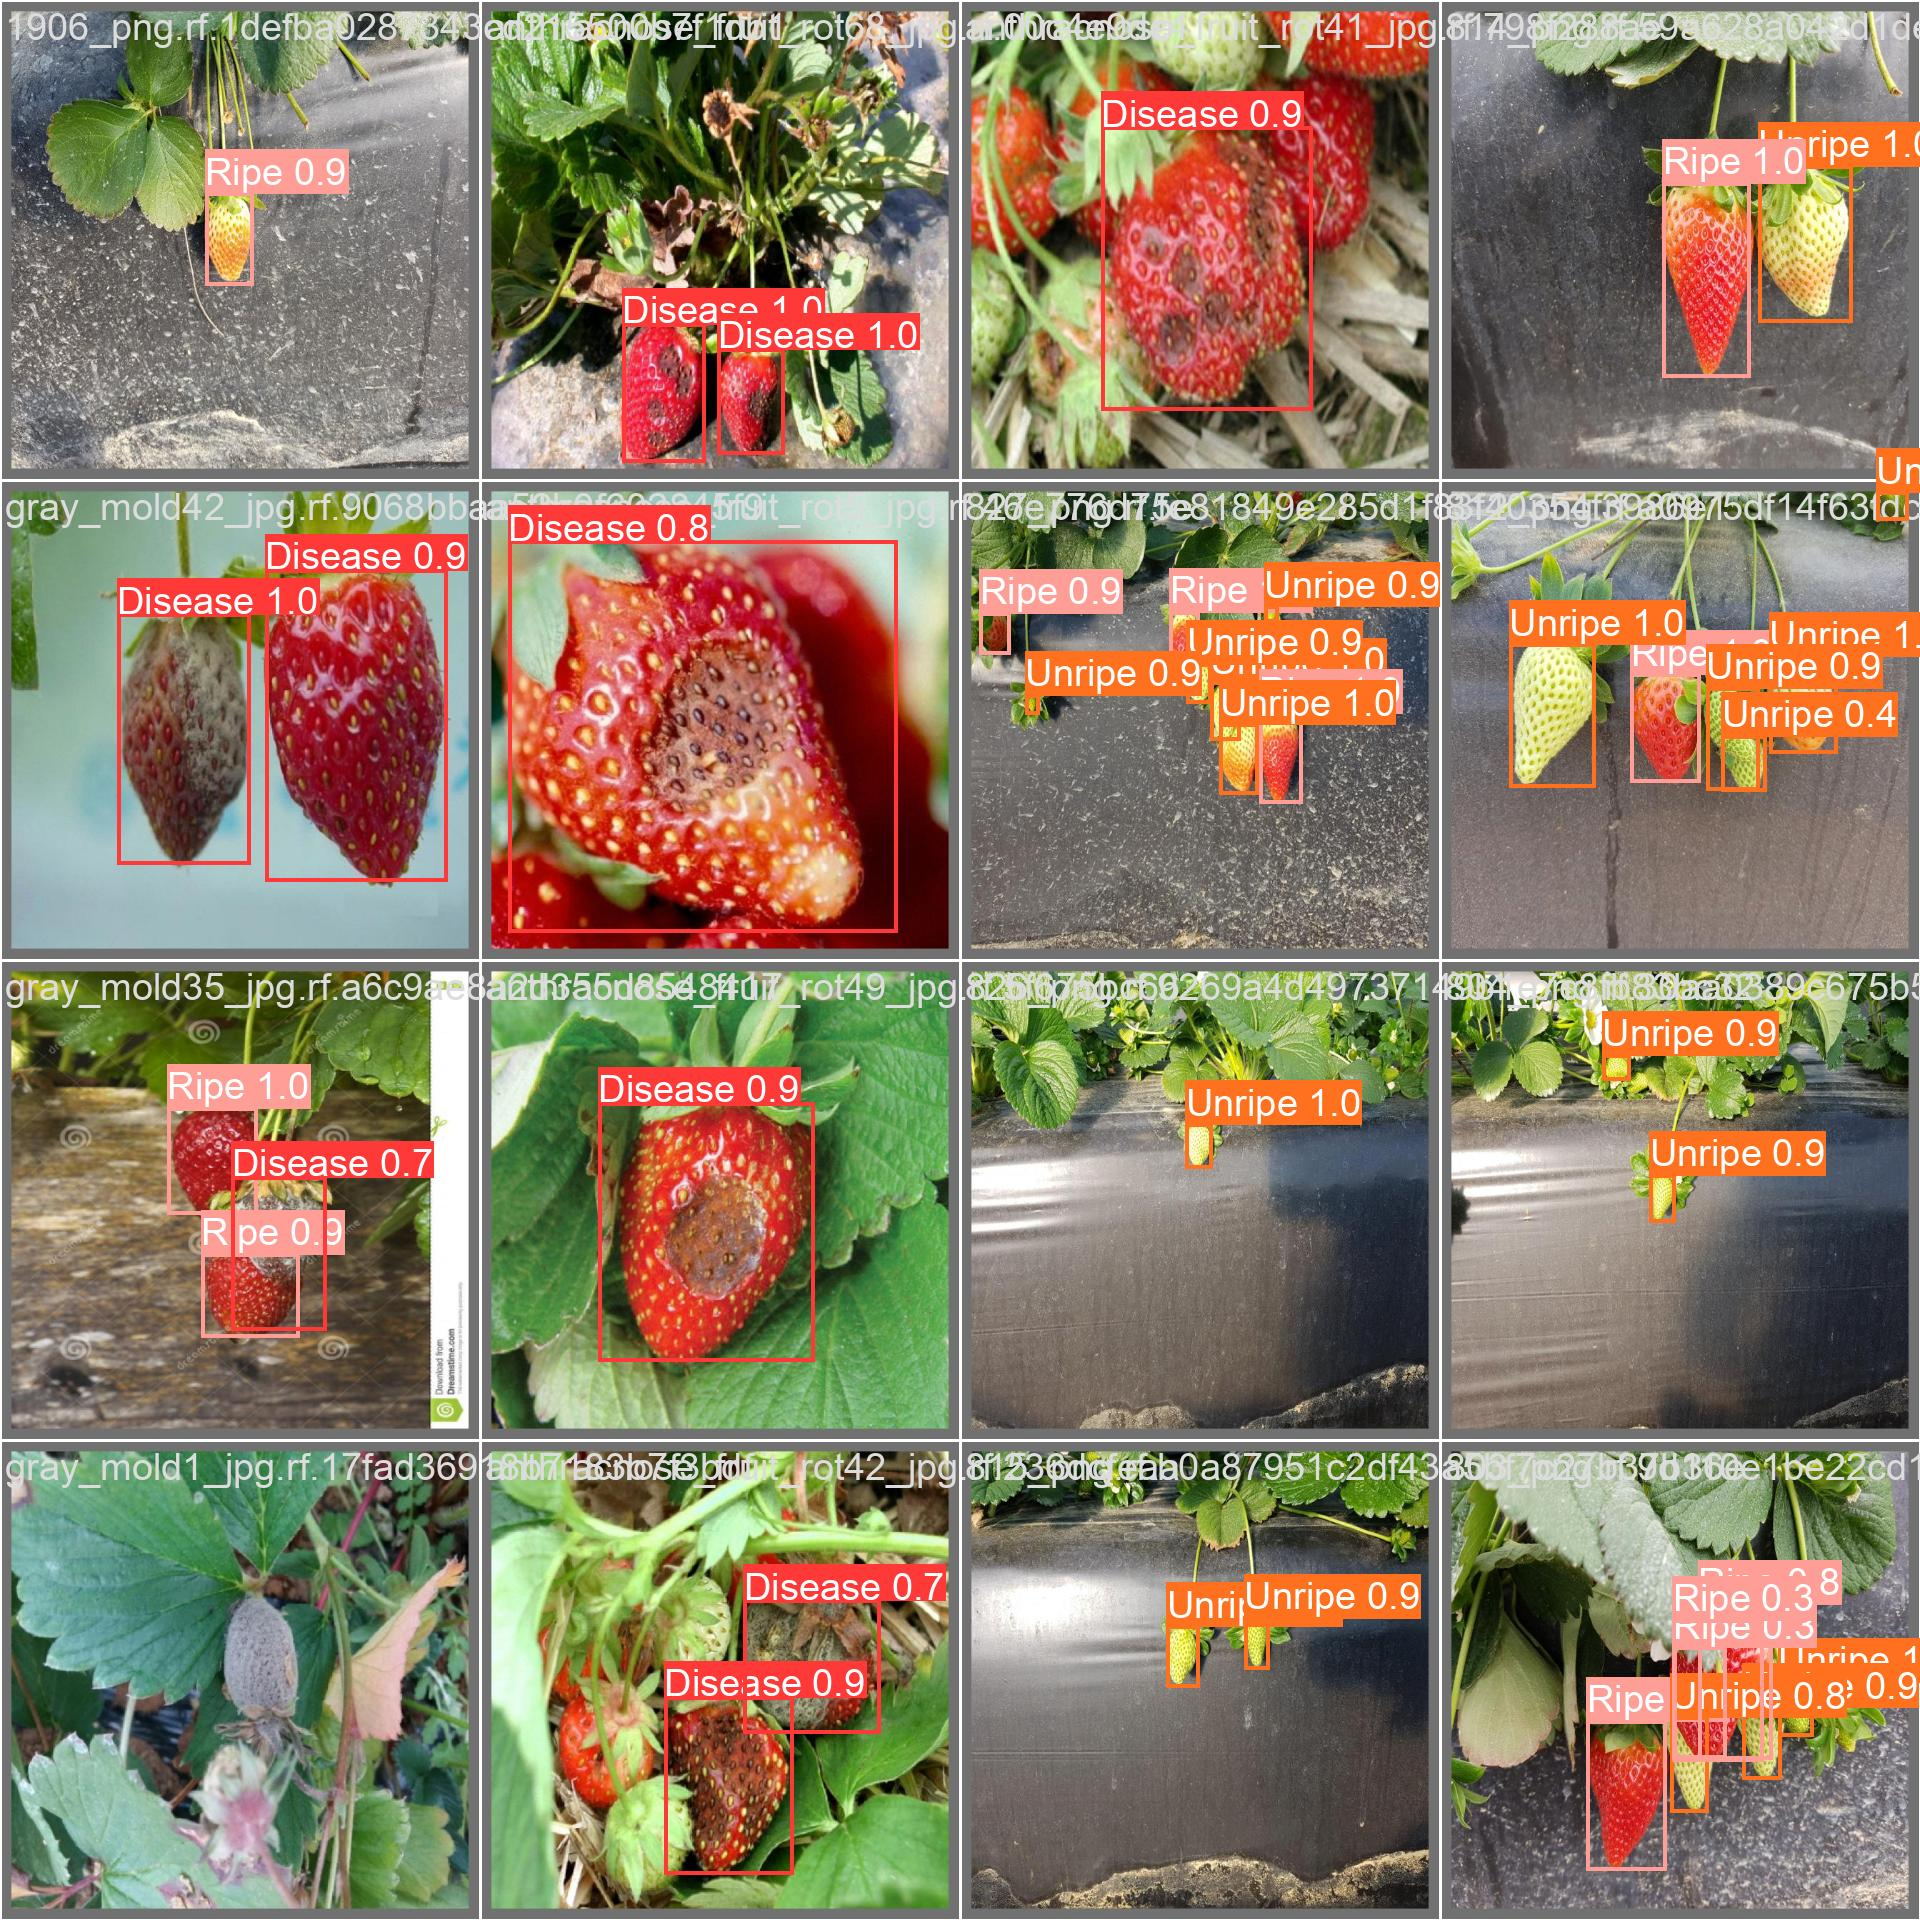

In [ ]:
%cd {HOME}
Image(filename=f'/content/yolov5/runs/train/exp/val_batch0_pred.jpg', width=900)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs

# 5.Validation

In [ ]:
# Validate YOLOv5m
%cd /content/yolov5
!python val.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data /content/dataset/data.yaml --img 640

/content/yolov5
val: data=/content/dataset/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /content/dataset/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:02<00:00,  2.02s/it]
                   all         30         85      0.856       0.93      0.936       0.61
               Disease         30         13      0.921      0.895      0.933      0.638
 

In [ ]:
# !lsof -i:6006

COMMAND     PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
tensorboa 24551 root   14u  IPv4 937298      0t0  TCP localhost:6006 (LISTEN)


In [ ]:
# !kill -9 24551

# 6.Test

## 6.1 Images

In [ ]:
%cd /content/yolov5
!python detect.py --weights  /content/yolov5/runs/train/exp/weights/best.pt --source /content/dataset/test/images --img 640 --conf 0.25

/content/yolov5
detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
image 1/15 /content/dataset/test/images/1913_png.rf.1e406ce1cf63c36b7fe2e44b914f39ca.jpg: 640x640 1 Ripe, 1 Unripe, 26.9ms
image 2/15 /content/dataset/test/images/1914_png.rf.e198088d2391af92b75a31b79d9b2374.jpg: 640x640 2 Ripes, 3 Unripes, 27.0ms
image 3/15 /content/dataset/test/images/

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov5/runs/detect/exp/*.jpg')[:15]:
      display(Image(filename=image_path, width=600))
      print("\n")

# 7.Test (on a Demo Video)

## 7.1 Video1(Ripe/Unripe)

In [ ]:
%cd /content/yolov5

!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --source /content/demo2.mp4 --img 640 --conf 0.25

/content/yolov5
detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/demo2.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
video 1/1 (1/178) /content/demo2.mp4: 384x640 6 Ripes, 5 Unripes, 50.5ms
video 1/1 (2/178) /content/demo2.mp4: 384x640 6 Ripes, 5 Unripes, 19.9ms
video 1/1 (3/178) /content/demo2.mp4: 384x640 6 Ripes, 5 Unripes, 19.9ms
video 1/1 (4/178) /content/demo2.mp4: 384x640 6 Ripes, 5 Unripes, 19.9ms
video 

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/yolov5/runs/detect/exp2/demo2.mp4'

# Compressed video path
compressed_path = "/content/result_compressed1.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## 7.2 Video2(Ripe/Unripe/Disease)

In [ ]:
%cd /content/yolov5

!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --source /content/demo5.mp4 --img 640 --conf 0.25

/content/yolov5
detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/demo5.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
video 1/1 (1/1451) /content/demo5.mp4: 416x640 2 Ripes, 50.0ms
video 1/1 (2/1451) /content/demo5.mp4: 416x640 2 Ripes, 20.9ms
video 1/1 (3/1451) /content/demo5.mp4: 416x640 2 Ripes, 20.9ms
video 1/1 (4/1451) /content/demo5.mp4: 416x640 2 Ripes, 20.9ms
video 1/1 (5/1451) /content/demo5.mp4: 416x640

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/yolov5/runs/detect/exp3/demo5.mp4'

# Compressed video path
compressed_path = "/content/result_compressed2.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ※Download the model

In [ ]:
!yolo task=detect mode=export model=yolov8m.pt format=onnx